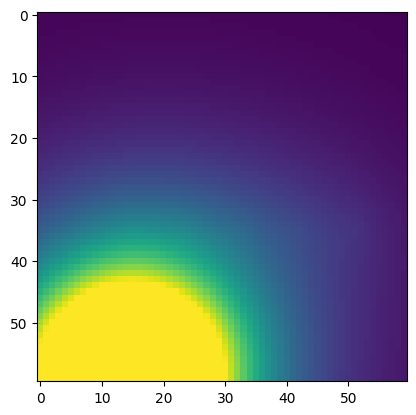

In [1]:
%reload_ext autoreload
%autoreload 2

# import sys
import numpy as np
# numpy.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(threshold= np.inf)

from Grid import Grid, Point
from Engine import Engine
import initial_states



init_config_tip_follows_attractor = { #'stalk_cells': initial_states.Stalk_pres,
                                    'tip_cells': [Point(14,14)],
                                    'attractor_cells': initial_states.Attractors_small3
                                        }
init_config_stalk_follows_tip = {'stalk_cells': initial_states.Stalk_pres,
                                    'tip_cells': [Point(15,15)],
                                    #'tip_cells': [Point(2,2), Point(2,28)],
                                    #'attractor_cells': initial_states.Attractors_small3
                                }

                                    
init_config_combined = {#'stalk_cells': initial_states.Stalk_pres,
                        'stalk_cells': initial_states.Stalk_pres_mid,
                #'tip_cells': [Point(2,2), Point(2,28), Point(14,2), Point(14,28)],
                # 'tip_cells': [Point(35,2), Point(35,58), Point(35,45), Point(35,40), Point(35,34)],
                'tip_cells': [Point(35, y) for y in range(15,58, 9)],
               'attractor_cells': initial_states.Attractors_small4
               }



grid1 = Grid(width=30, height=30, init_config=init_config_tip_follows_attractor)
grid2 = Grid(width=30, height=30, init_config=init_config_stalk_follows_tip)
grid3 = Grid(width=60, height=60, init_config=init_config_combined) #* Final result






In [2]:
engine1 = Engine(init_grid=grid1, generations=36)

engine1.run()

engine1.visualize()


In [7]:
engine2 = Engine(init_grid=grid2, generations=100)
engine2.run()
engine2.visualize()

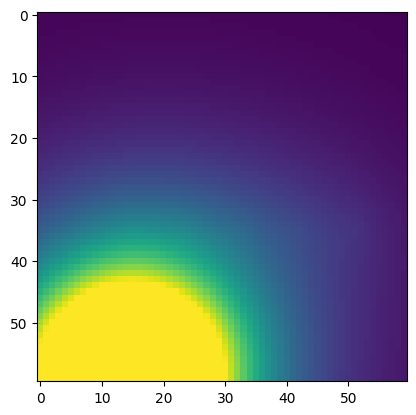

In [10]:
engine3 = Engine(init_grid=grid3, generations=100)

engine3.run()

engine3.visualize()